# Nuclear Potential:
Potential depth = $V_0$, Potential height = $V_c$, Amomic no. = $Z$, Atomic mass no. = $A$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh, eigh_tridiagonal
import scipy.constants as const
%matplotlib inline
# plt.style.use(['classic'])

Schrodinger equation in 1D:
$$ -\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi(x) = E \psi(x) $$

In [2]:
hcut = const.hbar
mass = const.proton_mass*2 + const.neutron_mass*2  # INPUT

In [3]:
L = 25e-15   # length of 1d domain
N = 200  # no. of grid points
x = np.linspace(0, L, N) # x axis

# potential
R0 = 1.2e-15
ep0 = const.epsilon_0
qe = const.elementary_charge

def potential1d(r, Z, A, V0):
    R = R0 * A**(1/3)
    pt = []
    for i in r:
        if 0<=i<R:
            pt.append(V0)
        else:
            Vcoulomb = 2*Z*qe**2/(4*np.pi*ep0*i)
            pt.append(Vcoulomb)
    return np.array(pt)

Z1, A1, V01 = 8, 16, -36e6*const.electron_volt   # INPUT
Vx = potential1d(r=x, Z=Z1, A=A1, V0=V01)

## Plotting Wavefunction and Probability density

Using **`eigh`**

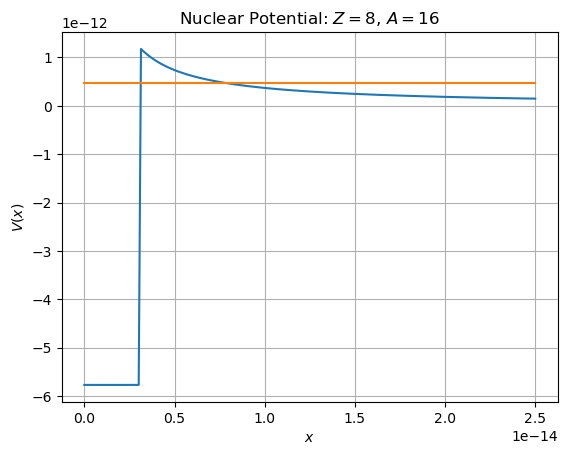

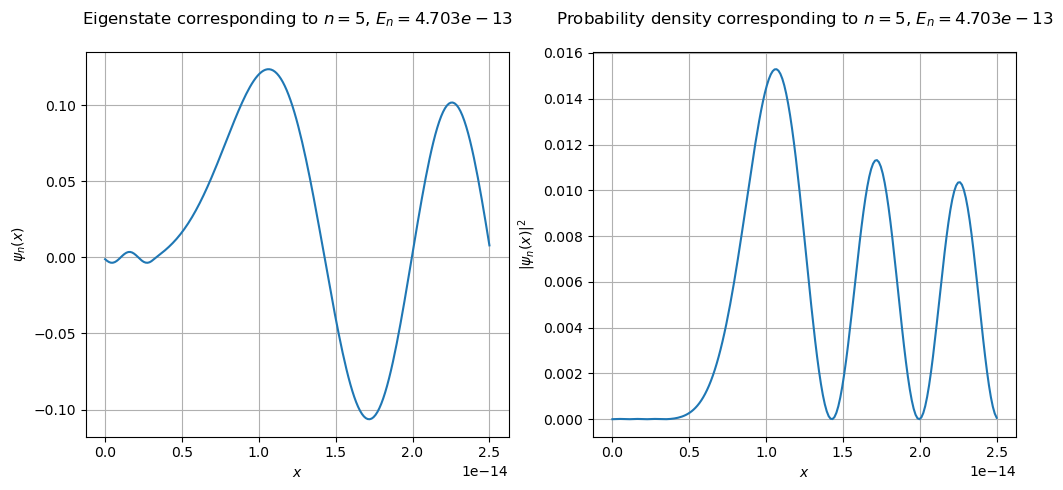

In [4]:
dx = x[1] - x[0]
T = (-hcut**2/(2*mass)) * (np.diag(-2/dx**2 * np.ones(N))
                        + np.diag(1/dx**2 * np.ones(N-1), 1)
                        + np.diag(1/dx**2 * np.ones(N-1), -1))
H = T + np.diag(Vx*np.ones(N))
eigvals1, eigvecsT1 = eigh(H)


n = 5   # INPUT

eigv = eigvals1[n]
eigf = eigvecsT1[:,n]

plt.plot(x, Vx)
plt.plot(x, eigv*np.ones(N))
plt.title(f'Nuclear Potential: $Z={Z1}$, $A={A1}$')
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.grid()
plt.show()

plt.figure(figsize=(12,5))
plt.tight_layout()
plt.subplot(121)
plt.plot(x, eigf)
plt.title(f'Eigenstate corresponding to $n={n}$, $E_n={eigv:.4}$\n')
plt.xlabel('$x$')
plt.ylabel(f'$\psi_n(x)$')
plt.grid()
plt.subplot(122)
plt.plot(x, eigf*eigf)
plt.title(f'Probability density corresponding to $n={n}$, $E_n={eigv:.4}$\n')
plt.xlabel('$x$')
plt.ylabel(f'$|\psi_n(x)|^2$')
plt.grid()
plt.show()

Probabilities

In [5]:
def tunnel_probs(n):
    psin = eigvecsT1[:,n]
    psin2 = psin*psin
    R = R0*A1**(1/3)
    psin_list = list(psin2)
    x_left = []
    x_right = []
    for i in x:
        if 0<=i<=R:
            x_left.append(i)
        else:
            x_right.append(i)

    psin2_left = psin2[:np.array(x_left).size]
    psin2_right = psin2[np.array(x_left).size:]
    prob_left, prob_right = np.sum(psin2_left), np.sum(psin2_right)
    prob_total = np.sum(psin2)
    return np.array([prob_left, prob_right])

mean life (is discussed later)

In [6]:
n = 12     # INPUT

R = R0*A1**(1/3)
En = eigvals1[n]
v = np.sqrt(2*En/mass)
T = np.min(tunnel_probs(n))

tm = R/v*T
print(f'Energy = {En}, mean life = {tm}')

Energy = 2.0215034760860294e-12, mean life = 3.0133120602608e-24


Different eigenstates in one graph

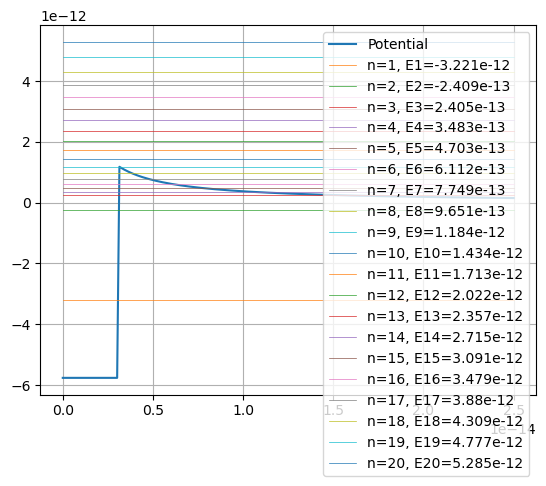

n=1, E1=-3.220527388e-12, [prob_left, prob_right]=[0.956239 0.043761]
n=2, E2=-2.408920449e-13, [prob_left, prob_right]=[0.83689763 0.16310237]
n=3, E3=2.405446477e-13, [prob_left, prob_right]=[3.49279167e-07 9.99999651e-01]
n=4, E4=3.483044738e-13, [prob_left, prob_right]=[1.54142066e-05 9.99984586e-01]
n=5, E5=4.702911888e-13, [prob_left, prob_right]=[1.72071564e-04 9.99827928e-01]
n=6, E6=6.111721456e-13, [prob_left, prob_right]=[8.60488160e-04 9.99139512e-01]
n=7, E7=7.748582529e-13, [prob_left, prob_right]=[0.00250695 0.99749305]
n=8, E8=9.65096608e-13, [prob_left, prob_right]=[0.00510854 0.99489146]
n=9, E9=1.184430774e-12, [prob_left, prob_right]=[0.00839376 0.99160624]
n=10, E10=1.433867613e-12, [prob_left, prob_right]=[0.01232431 0.98767569]
n=11, E11=1.713242876e-12, [prob_left, prob_right]=[0.01733552 0.98266448]
n=12, E12=2.021503476e-12, [prob_left, prob_right]=[0.02448856 0.97551144]
n=13, E13=2.356599951e-12, [prob_left, prob_right]=[0.03584336 0.96415664]
n=14, E14=2.71

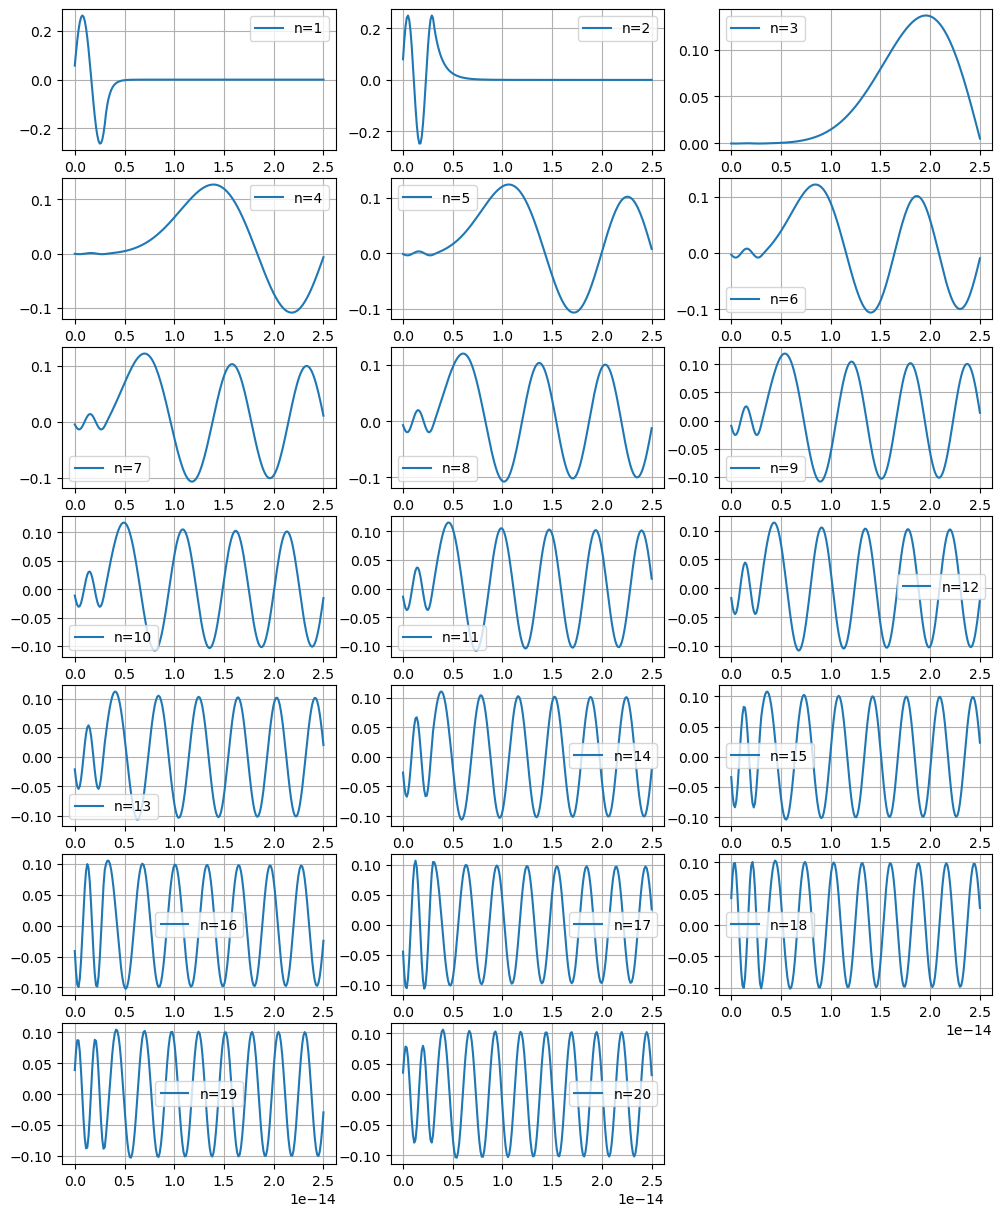

In [7]:
nmin, nmax = 1, 20  # INPUT

plt.plot(x, Vx, label='Potential')
for i in range(nmin, nmax+1):
    plt.plot(x, eigvals1[i]*np.ones(N), label=f'n={i}, E{i}={eigvals1[i]:.4}', lw=0.5)
plt.legend(loc='best')
plt.grid()
plt.show()

plt.figure(figsize=(12, 15))
# plt.tight_layout()
for i in range(nmin, nmax+1):
    print(f'n={i}, E{i}={eigvals1[i]:.10}, [prob_left, prob_right]={tunnel_probs(i)}')
    plt.subplot((nmax+1-nmin)//3 +1, 3, i-nmin+1)
    plt.plot(x, eigvecsT1[:,i], label=f'n={i}')
    plt.legend(loc='best')
    plt.grid()
plt.show()

Properties of Wavefunction:

In [8]:
m1, m2 = 14, 16   # INPUT
psim1,psim2 = eigvecsT1[:, m1], eigvecsT1[:, m2]
print(f'orthogonality: expected=0, result={np.sum(psim1*psim2)}')
print(f'normalization check: expected=1, result={np.sum(psim2*psim2)}')

orthogonality: expected=0, result=1.2077144839750531e-14
normalization check: expected=1, result=0.9999999999999996


## Radioactive decay law:
$$ \frac{dN}{dt} = -\lambda N $$
$$ \implies N = N_0 \exp(-\lambda t) = N_0 \exp(-t/\tau) $$
Mean life, 
$$ \tau = \frac{1}{\lambda} = \frac{R}{vT} $$
where,
- $R = R_0 A^{1/3}$ is the radius of nucleus.
- $E=\frac{1}{2}mv^2$ is the kinetic energy of $\alpha$ particle and $v$ is its velocity.
- $T$ is the tunneling probability.

In [9]:
n = 12     # INPUT

R = R0*A1**(1/3)
En = eigvals1[n]
v = np.sqrt(2*En/mass)
T = np.min(tunnel_probs(n))

tm = R/v*T
print(f'Energy = {En}, mean life = {tm}')

Energy = 2.0215034760860294e-12, mean life = 3.0133120602608e-24
